In [41]:
import pandas as pd
from PIL import Image as Img
import numpy as np

In [42]:
cd

C:\Users\abc


In [43]:
df = pd.read_csv('ML/spm_task_spider/covid-data.csv')

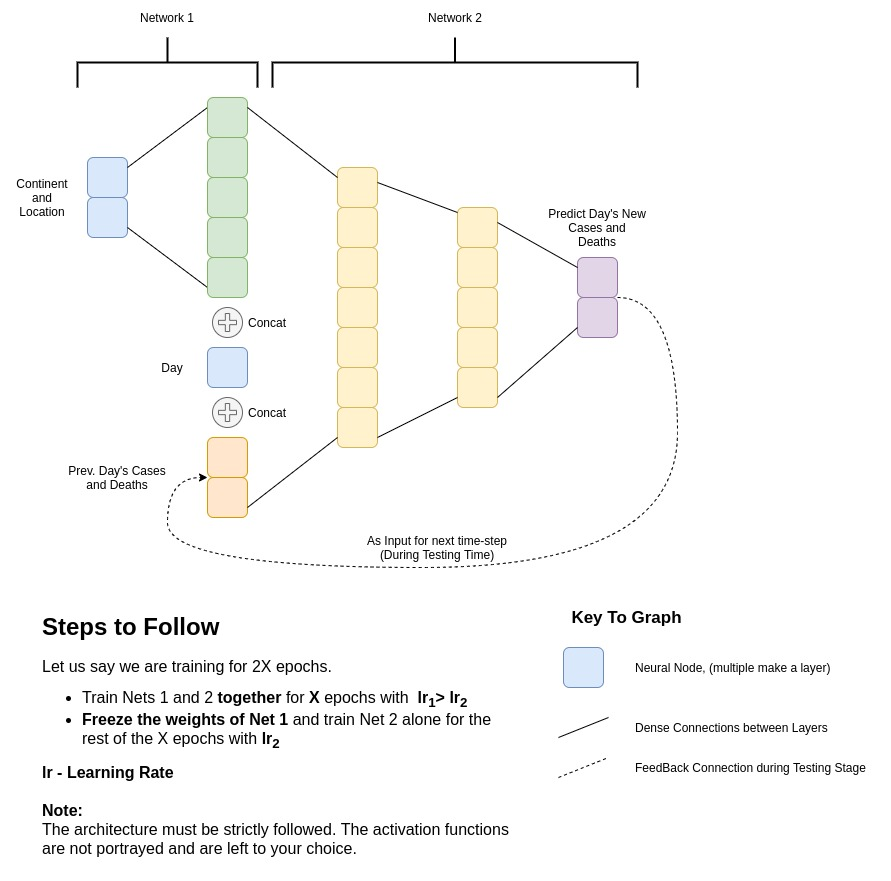

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34873 entries, 0 to 34872
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   iso_code                         34873 non-null  object
 1   continent                        34873 non-null  object
 2   location                         34873 non-null  object
 3   date                             34873 non-null  object
 4   total_cases                      34873 non-null  object
 5   new_cases                        34873 non-null  object
 6   total_deaths                     34873 non-null  object
 7   new_deaths                       34873 non-null  object
 8   total_cases_per_million          34873 non-null  object
 9   new_cases_per_million            34873 non-null  object
 10  total_deaths_per_million         34873 non-null  object
 11  new_deaths_per_million           34873 non-null  object
 12  new_tests                       

In [44]:
df = pd.read_csv('ML/spm_task_spider/covid-data.csv')
df.drop('iso_code', axis=1) 
for col in df.columns: 
    # print(col) 
    df[col] = df[col].astype(str).str.replace(',', '')
    #df[col] = df[col].astype('float64')   
    # #data[col] = pd.to_numeric(df[col])
path = "ML/spm_task_spider/Task 1 v1.jpg"
display(Img.open(path))
df.info()
# print(df['record_id'].dtype)


In [45]:
Y_train = np.array(df[['new_cases', 'new_deaths']].astype('float')) #get output

X_train = np.array(df[['continent', 'location','date','total_cases','total_deaths']] )                #numpy array
print('shape of X_train :',X_train.shape)
print('shape of Y_train : ',Y_train.shape)


shape of X_train : (34873, 5)
shape of Y_train :  (34873, 2)


In [46]:
#set_of_continent = set(X_train[:,1])
#here we gave name to continent for training 

continent = X_train[:,0]
for i in range(X_train.shape[0]):
    a = continent[i]
    if a == 'Africa':
       continent[i] = 1
    elif a == 'Asia' :
       continent[i] = 2
    elif a == 'Europe' :
       continent[i] = 3
    elif a == 'North America' :
        continent[i] = 4
    elif a == 'Oceania' :
       continent[i] = 5
    elif a == 'South America' :
        continent[i] = 6
    else :
         continent[i] = 7

X_train[:,0] = continent
print(X_train.shape)

(34873, 5)


In [47]:
location_set = list(set(X_train[:,1]))
date = list(X_train[:,2])
location = X_train[:,1]
for i in range(X_train.shape[0]):
    date[i] = i
    for j in range(len(location_set)):
        a = location_set[j]
        if location[i] == a :
            location[i] = j
X_train[:,1] = location
X_train[:,2] = date

In [48]:
#nana > 0 converte
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[1]):
        if X_train[i][j] == 'nan' :
            X_train[i][j] = int(0)
X_train = X_train.astype('float')

In [49]:
def initialization_weight():
    params_weight = {}
    grad = {}
   # a = [2,5,7,5,2] #first in input other is hidden layers size
    params_weight[ 'W1']=  np.random.randn(5,5) 
    params_weight[ 'b1'] = np.zeros((5,1))
    params_weight[ 'W2']=  np.random.randn(7,8)  #we add 8 for second layer ,extra 3 hidden input
    params_weight[ 'b2'] = np.zeros((7,1))
    params_weight[ 'W3']=  np.random.randn(5,7) 
    params_weight[ 'b3'] = np.zeros((5,1))
    params_weight[ 'W4']=  np.random.randn(2,5) 
    params_weight[ 'b4'] = np.zeros((2,1))
# x0.shape[0], x0.shape[1]
    for i in range(1,5):
        grad['dW'+ str(i)] = np.random.randn(params_weight[ 'W' + str(i)].shape[0],params_weight[ 'W' + str(i)].shape[1])
        grad['db'+ str(i)] = np.zeros((params_weight[ 'b' + str(i)].shape[0],params_weight[ 'b' + str(i)].shape[1]))
    return params_weight, grad
   
params_weight = initialization_weight()


In [50]:
def Activation(prev_input,w,b,activation):
    #print(type(prev_input[3]),prev_input[3])
    z =np.dot(w,prev_input) + b
    #print('z',type(z),z)
    if activation == 'sigmoid' :
        A = 1 /(1 + np.exp(-z))
    elif activation == 'relu' :
        A = z * (z > 0)
    elif activation == 'tanh':
        A = np.tanh(z)
    else :
        A = z
    return A,z

In [51]:
def forward_activation(X,params_weight,day,case,death,net_num):
    cata = np.array([[day], [case],[death]])
    cache = {}
    if net_num == 1 :
        X = np.reshape(X,(5,1))
        A1,cache['Z1']= Activation(X,params_weight['W1'],params_weight['b1'],'tanh')
        cache['A1'] = np.concatenate((A1, cata), axis=0) # we add here for recursive
        cache['A2'],cache['Z2'] = Activation(cache['A1'],params_weight['W2'],params_weight['b2'],'tanh')   
        cache['A3'],cache['Z3'] = Activation(cache['A2'],params_weight['W3'],params_weight['b3'],'tanh')
        cache['A4'],cache['Z4'] = Activation(cache['A3'],params_weight['W4'],params_weight['b4'],'final')
        return cache 

    else :
        X = X[:5,:]
        cache['A1'] = np.concatenate((X, cata), axis=0)
        cache['A2'],cache['Z2'] = Activation(cache['A1'],params_weight['W2'],params_weight['b2'],'tanh')               
        cache['A3'],cache['Z3'] = Activation(cache['A2'],params_weight['W3'],params_weight['b3'],'tanh')
        cache['A4'],cache['Z4'] = Activation(cache['A3'],params_weight['W4'],params_weight['b4'],'final')
        return cache 


In [52]:
def loss(predicted , original):
    # print(predicted.shape,original.shape)
    original = np.reshape(original,(original.shape[0],2))
    # print(type(predicted),type(original),'SHAPE_PREDICTED:',predicted.shape,'origin_shape',original.shape)
    errors =np.sum(predicted - original) / original.shape[0]
    return errors

In [53]:
def backward(X,Y,cache,params_weight,grad,net_num):
    X = np.reshape(X,(X.shape[0],1)) 
    Y = np.reshape(Y,(2,1))
    A1 = cache['A1']
    # m = X.shape(0)
    grad['dZ4'] = cache['A4' ] - Y
    grad['dW4'] += np.dot(grad['dZ4'], cache['A3'].T)
    grad['db4'] += np.sum(grad['dZ4'].T, axis=1, keepdims=True)
    #
    #
    grad['dZ3'] = np.dot(params_weight['W4'].T,grad['dZ4' ]) * (1 - np.power(cache['A3'], 2))
    grad['dW3'] +=  np.dot(grad['dZ3'], cache['A2'].T)
    grad['db3'] +=  np.sum(grad['dZ3'].T, axis=1, keepdims=True)
    #
    grad['dZ2'] = np.dot(params_weight['W3'].T,grad['dZ3' ]) * (1 - np.power(cache['A2'], 2))
    grad['dW2'] +=  np.dot(grad['dZ2'], A1.T)
    grad['db2'] +=  np.sum(grad['dZ2'].T, axis=1, keepdims=True)

    #
    if net_num == 1:
        # print("A1:",cache['A1'].shape,"  dZ2:",grad['dZ2' ].shape,"  W2:",params_weight['W2'].shape)
        grad['dZ1'] = np.dot( params_weight['W2'].T,grad['dZ2' ]) * (1 - np.power(cache['A1'], 2))
        Z1 =  grad['dZ1'][:5,:]
        grad['dW1'] +=  np.dot(Z1, X.T)
        grad['db1'] +=  np.sum(grad['dZ1'].T, axis=1, keepdims=True)
    return grad

In [54]:
def update_parameter(params_weight,grad,learning_rate,net_num):
    if net_num == 1 :
        dW1 =  grad['dW' + str(1)]
        db1 =  grad['db' + str(1)]
        params_weight['W' + str(1)] = params_weight['W' + str(1)] - learning_rate * dW1[:5,:]
        params_weight['b' + str(1)] = params_weight['b' + str(1)] - learning_rate *db1[:5,:]
    for l in range(2,5):
        params_weight['W' + str(l)] = params_weight['W' + str(l)] - learning_rate * grad['dW' + str(l)]
        params_weight['b' + str(l)] = params_weight['b' + str(l)] - learning_rate * grad['db' + str(l)]
    return params_weight

In [55]:

def model(X_train,Y_train,epoch,learning_rate_1,learning_rate_2):
    day,new_case,new_death = 0,0,0
    params_weight, grad = initialization_weight()
    for i in range(epoch//2):
        error = 0
        Y_pred = np.zeros((X_train.shape[0],2))
        for X in range(X_train.shape[0]) :
            cache = forward_activation(X_train[X],params_weight,X,new_case,new_death,1)
            grad = backward(X_train[X],Y_train[X],cache,params_weight,grad,1)
            b = np.reshape(cache['A4'],(2))
            Y_pred[X] = b
            new_case = b[0]
            new_death = b[1]
        for l in range(1,5):
            grad['dW' + str(l)] =  grad['dW' + str(l)] / X_train.shape[0]
            grad['db' + str(l)] =  grad['db' + str(l)] / X_train.shape[0]
        params_weight = update_parameter(params_weight,grad,learning_rate_1,1)
        error= loss(Y_pred, Y_train)
        print("net_1 epoch ", i," error: ",error)

    # for net 2
    print("========NET 2=========")
    X_net_2 = cache['A1']

    for i in range(epoch//2,epoch):
        error = 0
        Y_pred = np.zeros((X_train.shape[0],2))
        for X in range(X_train.shape[0]) :
            cache = forward_activation(X_net_2,params_weight,X,new_case,new_death,2)
            grad = backward(X_train[X],Y_train[X],cache,params_weight,grad,2)
            b = np.reshape(cache['A4'],(2)) 
            Y_pred[X] = b
            new_case = b[0]
            new_death = b[1]
        for l in range(2,5):
            grad['dW' + str(l)] =  grad['dW' + str(l)] / X_train.shape[0]
            grad['db' + str(l)] =  grad['db' + str(l)] / X_train.shape[0]
        params_weight = update_parameter(params_weight,grad,learning_rate_2,2)
        error= loss(Y_pred, Y_train)
        print("net_2 epoch ", i," error: ",error) 
    return params_weight,grad,cache

In [56]:
# make dataset in standarization

x_np = np.asarray(X_train)
z_scores_np = (x_np - x_np.mean()) / x_np.std()

# Min-Max scaling
X_train = (x_np - x_np.min()) / (x_np.max() - x_np.min())


In [60]:
params_weight,grad,cache = model(X_train[:1100,:],Y_train[:1100,:],epoch=70,learning_rate_1=0.02,learning_rate_2=0.001)

net_1 epoch  0  error:  -72.45421923213955
net_1 epoch  1  error:  -63.637920958665745
net_1 epoch  2  error:  -55.36954906223063
net_1 epoch  3  error:  -47.72004608339743
net_1 epoch  4  error:  -41.1648433992154
net_1 epoch  5  error:  -35.202900523882484
net_1 epoch  6  error:  -30.270960278678825
net_1 epoch  7  error:  -26.029915196669904
net_1 epoch  8  error:  -22.38290416055461
net_1 epoch  9  error:  -19.24682868281223
net_1 epoch  10  error:  -16.550237309802014
net_1 epoch  11  error:  -14.231711170288568
net_1 epoch  12  error:  -12.23852993244964
net_1 epoch  13  error:  -10.525590164958325
net_1 epoch  14  error:  -9.05428993625784
net_1 epoch  15  error:  -7.789111663449453
net_1 epoch  16  error:  -6.698037391131468
net_1 epoch  17  error:  -5.773104657772432
net_1 epoch  18  error:  -4.953136912211544
net_1 epoch  19  error:  -4.36875406890418
net_1 epoch  20  error:  -6.443187125008084
net_1 epoch  21  error:  -9.56014370117447
net_1 epoch  22  error:  -7.18107518298

In [61]:
params_weight,grad,cache


({'W1': array([[-1.60863808, -1.03663933, -0.33381158,  0.56002433, -0.24713528],
         [-0.29115476,  1.56230338,  0.59463455,  0.74059928,  1.66909635],
         [-0.50124527,  0.54195386,  0.33296679,  0.83777723, -0.93082367],
         [ 0.74590616, -1.33630669,  1.95097834,  0.97914022, -0.38140602],
         [-1.07146315,  0.81229339, -0.21551802,  1.17905897,  0.54586058]]),
  'b1': array([[-541.89649377],
         [-541.89649377],
         [-541.89649377],
         [-541.89649377],
         [-541.89649377]]),
  'W2': array([[-6.12057433e-01, -1.38262238e+00,  6.65529122e-02,
          -4.49335930e-02,  1.59916476e+00,  3.48084346e-01,
           1.08387388e-01,  6.25453664e-01],
         [ 5.04303738e-01, -6.06575031e-01,  4.01630487e-01,
           8.13266782e-01, -1.23126367e+00, -1.02853832e+00,
          -9.35097750e-01,  1.32144061e-02],
         [-3.85134227e-02,  6.92766599e-01, -6.39811151e-01,
           4.46110730e-01,  1.38887771e-02, -4.47274796e+00,
           1